## 簡易策略：以定期定額 0050 去探討定期定額對上期初 All in ，哪個情況報酬率更好。
### 回測更新時間 [ 2025-05-20 ]



In [1]:
import Backtest_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import matplotlib.ticker as ticker
import statsmodels.api as sm
import matplotlib.ticker as mtick
from Backtest_model import logic_para

In [2]:
Row_data = pd.read_csv(f'clean_backtest_data.csv')
data_use = Row_data.copy()
data_use['mdate'] = pd.to_datetime(data_use['mdate'])
data_use = data_use.rename(columns={
    'mdate': 'Date',
    'ROI': 'Ret',
    'coid': 'Symbol',
    'Close': 'ori_Close'
})

data_use['Close'] = data_use['ori_Close'] * data_use['Adjust_Factor']
data_use['Symbol'] = data_use['Symbol'].astype(str)
data_use = data_use.sort_values('Date')

/var/folders/st/lxg2kchn65x5y9ldzc2d4qgh0000gn/T/ipykernel_69068/314268868.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Row_data = pd.read_csv(f'clean_backtest_data.csv')


In [3]:
# 簡易策略邏輯：

para = logic_para()
para.state = False


def logic(idx, date, portfolio, performance, market, factor_data, para):
    if idx % 120 == 0 and idx != 0:
        portfolio.add_cash(reinvestment_money = 10_000)
        print(f'{date}:增加資金')

    if idx % 120 == 1:
        Backtest_model.order(portfolio = portfolio, symbol = '0050', target = 1.0, Market=market)
        print(f"{date}:投入資金於0050")



result = Backtest_model.run_backtest(data = data_use,
                       strategy_function = logic, 
                       start_date = '2020-01-01', 
                       end_date = '2025-01-01', 
                       Benchmark_code = '0050',
                       factor_data = None, 
                       initial_cash = 10_000,
                       logic_para=para)


# 呼叫函數 compute_stat() 計算回測績效數據
result.compute_stat()

-------------------------------------------------- Strategy Logic Start --------------------------------------------------
2020-01-03:投入資金於0050
2020-07-07:增加資金
2020-07-08:投入資金於0050
2020-12-25:增加資金
2020-12-28:投入資金於0050
2021-06-30:增加資金
2021-07-01:投入資金於0050
2021-12-20:增加資金
2021-12-21:投入資金於0050
2022-06-23:增加資金
2022-06-24:投入資金於0050
2022-12-12:增加資金
2022-12-13:投入資金於0050
2023-06-19:增加資金
2023-06-20:投入資金於0050
2023-12-12:增加資金
2023-12-13:投入資金於0050
2024-06-14:增加資金
2024-06-17:投入資金於0050
2024-12-10:增加資金
2024-12-11:投入資金於0050
-------------------------------------------------- Strategy Logic End --------------------------------------------------


,指標,數值
0,累積報酬率,0.6823
1,年化報酬率,0.1138
2,年化波動度,0.2171
3,夏普比率,0.5244
4,最大回撤,-0.3778
5,Calmar比率,0.3013
6,Alpha (年化),-0.0687
7,Beta,0.9987
8,Benchmark 累積報酬率,1.3657
9,Benchmark 年化報酬率,0.1954


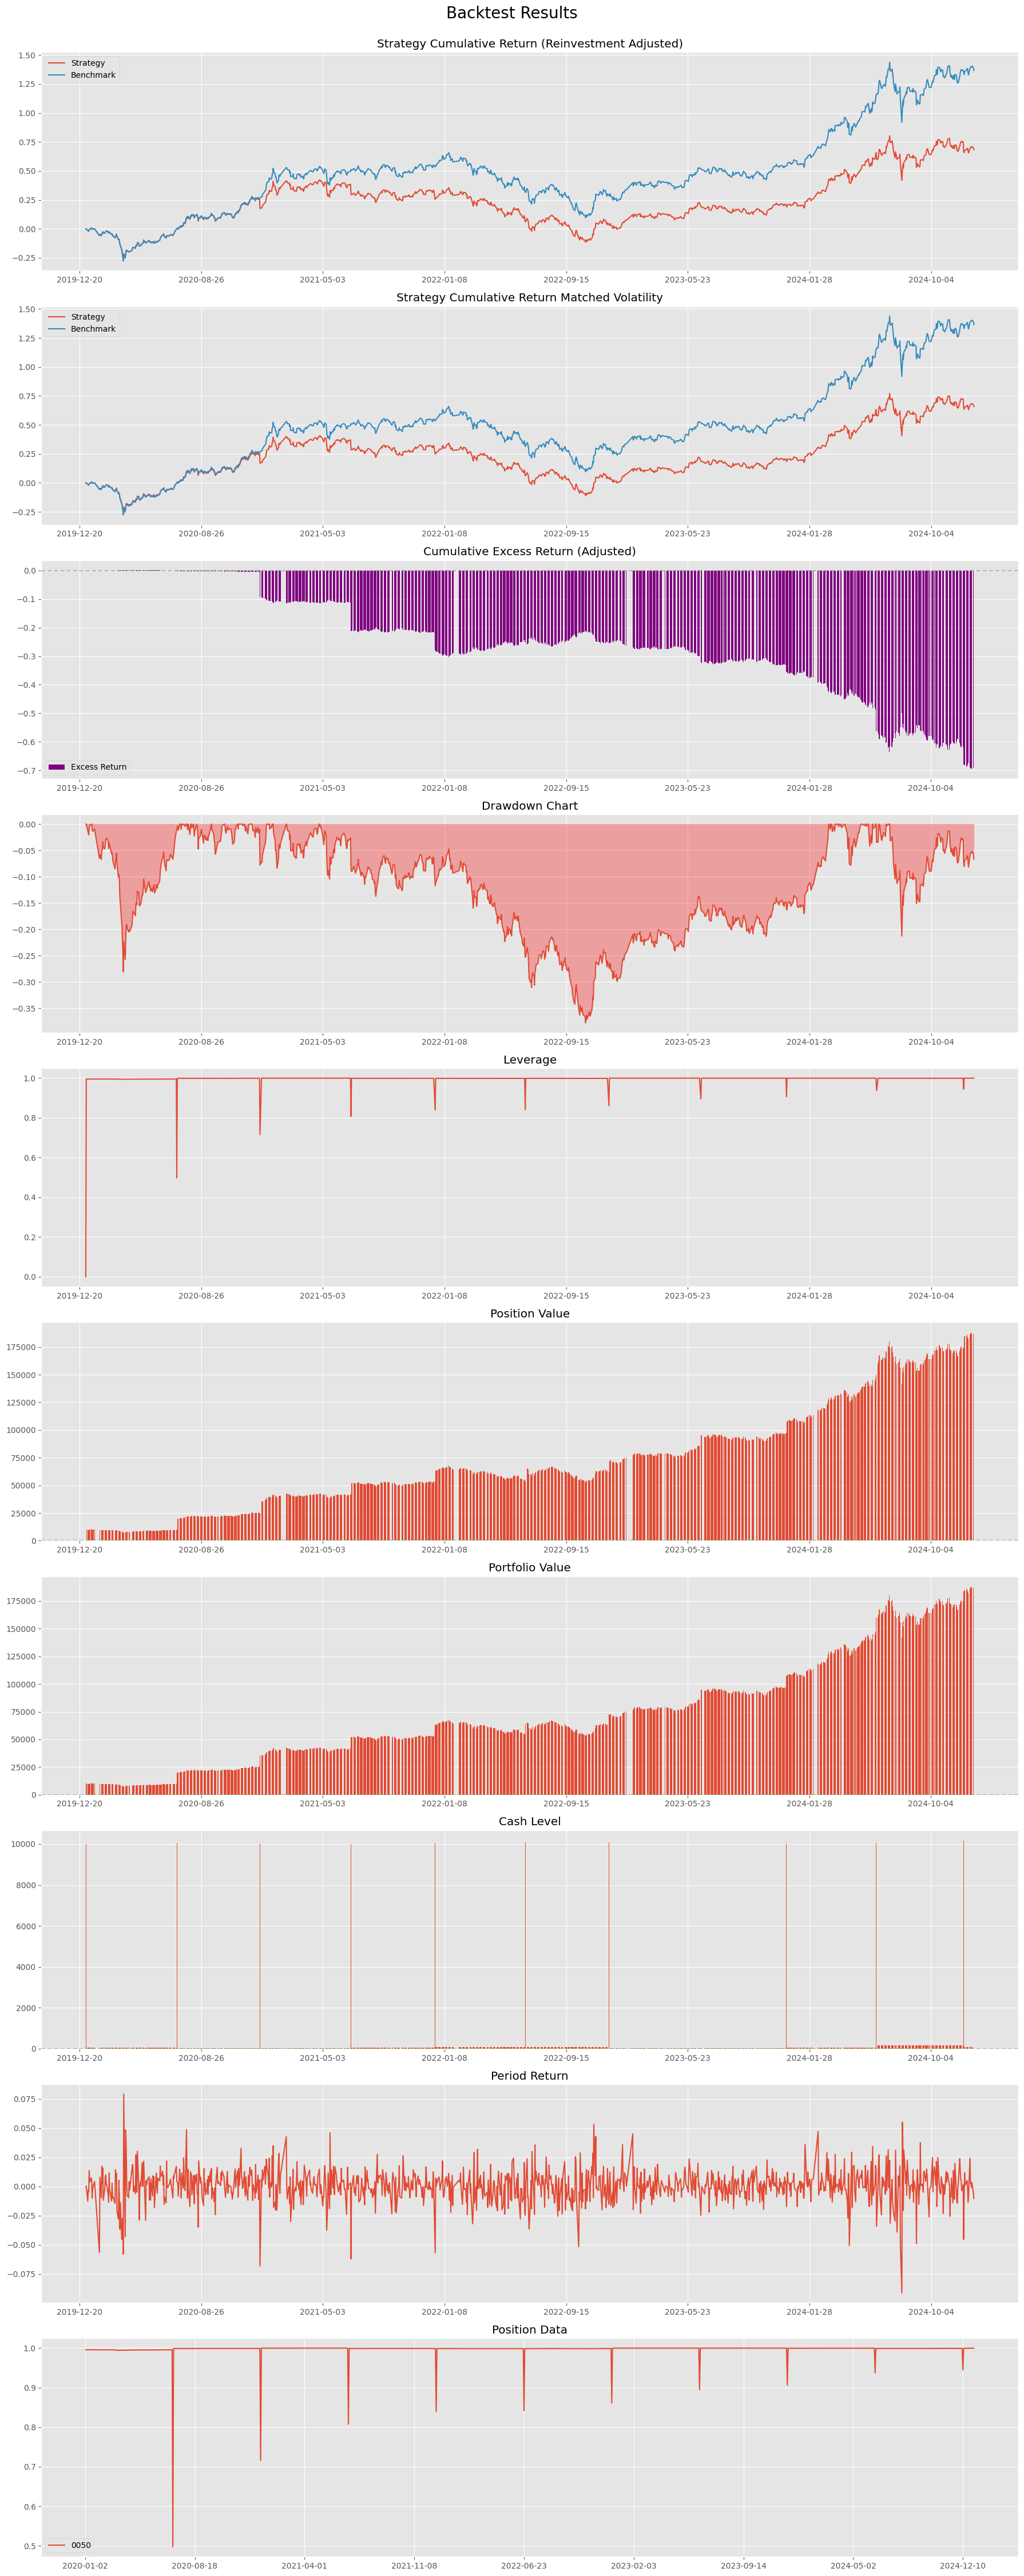

In [5]:
result.plot_performance()